<a href="https://colab.research.google.com/github/sunn-123/Customer_classification/blob/main/Customer_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1.number of cus

import numpy as np
import pandas as pd
np.random.seed(42)

n_customers =500

ages = np.random.randint(18,70,n_customers)
genders = np.random.randint(0,2,n_customers)
income =np.random.normal(50,15,n_customers)
purchase_freq=np.random.poisson(3,n_customers)

churn =((income<40)&(purchase_freq<3)).astype(int)


df_customers=pd.DataFrame({
    'Age':ages,
    'Gender':genders,
    'Income':income,
    'Purchase_freq':purchase_freq,
    'Churn':churn
    })
df_customers.to_csv('customers.csv',index=False)

print("customer data created and saved to customers.csv")
print(df_customers.head())



customer data created and saved to customers.csv
   Age  Gender     Income  Purchase_freq  Churn
0   56       1  24.449263              2      1
1   69       0  49.166785              2      0
2   46       0  55.760982              4      0
3   32       1  49.509579              4      0
4   60       0  18.988368              1      1


In [2]:
# 2.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,classification_report

In [3]:
 #3.
df=pd.read_csv('customers.csv')

#shows top rows
df.head()

,Age,Gender,Income,Purchase_freq,Churn
0,56,1,24.449263,2,1
1,69,0,49.166785,2,0
2,46,0,55.760982,4,0
3,32,1,49.509579,4,0
4,60,0,18.988368,1,1


In [4]:
# 4.
#data info and check for nul
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Gender         500 non-null    int64  
 2   Income         500 non-null    float64
 3   Purchase_freq  500 non-null    int64  
 4   Churn          500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
Purchase_freq,0
Churn,0


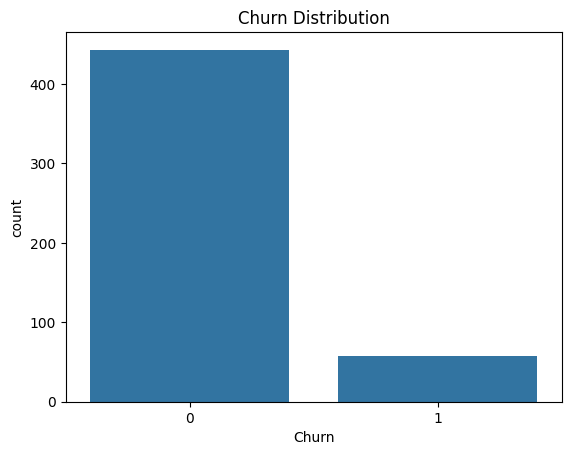

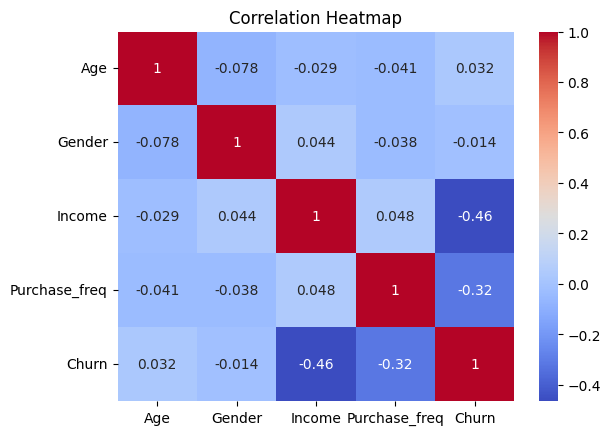

In [5]:
# 5.
#churn dis
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# 6.
x=df.drop('Churn',axis=1)
y=df['Churn']

#split into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
# 7.
#train model
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

Accuracy: 0.91
Confusion Matrix:
[[85  2]
 [ 7  6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



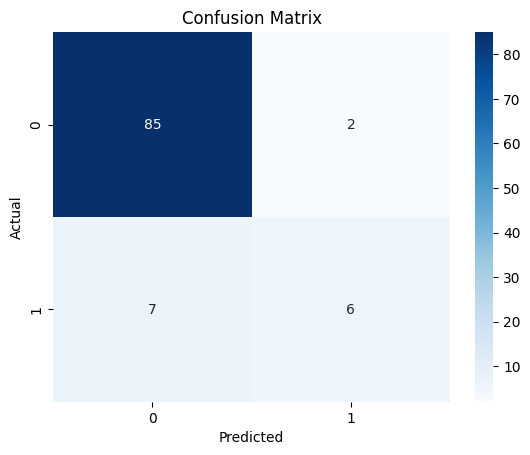

In [8]:
 #8.
#predict
y_pred=model.predict(x_test)

#accurancy
print("Accuracy:",accuracy_score(y_test,y_pred))

#confussion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

#classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))


sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [10]:
 #9.
new_customer=pd.DataFrame({
   'Age':[28],
    'Gender':[1],
    'Income':[37],
    'Purchase_freq':[2],
})

#predict churn
prediction=model.predict(new_customer)[0]

if prediction==1:
    print("This Customer is likely to churn. consider offering retention benefits")
else:
    print("This Customer is likely to stay. continioue engagement as usual.")
print("Prediction:",prediction)

This Customer is likely to stay. continioue engagement as usual.
Prediction: 0
